In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

In [2]:
# import the dataset
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip'
!unzip /content/CCPP.zip
df = pd.read_excel('/content/CCPP/Folds5x2_pp.xlsx')
df.head()

--2024-06-19 15:01:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘CCPP.zip’

CCPP.zip                [   <=>              ]   3.50M  6.75MB/s    in 0.5s    

2024-06-19 15:01:47 (6.75 MB/s) - ‘CCPP.zip’ saved [3674852]

Archive:  /content/CCPP.zip
   creating: CCPP/
  inflating: CCPP/Folds5x2_pp.ods    
  inflating: CCPP/Folds5x2_pp.xlsx   
  inflating: CCPP/Readme.txt         
  inflating: CCPP/Readme.txt~        


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# Define a Function to Get Outputs of the Model
def get_outputs(data) :
  y1 = data.pop('PE')
  y1 = np.array(y1)
  y2 = data.pop('V')
  y2 = np.array(y2)
  return y1,y2

In [7]:
# Split the Data into train and test with 80% train 20% test
train, test = train_test_split(df, test_size = 0.2, random_state= 1)

In [8]:
# getting the outputs (PE) and (V) of the train and test data
y_train = get_outputs(train)
y_test = get_outputs(test)

#Scaling the inputs
min_max = MinMaxScaler()

X_train = min_max.fit_transform(train)
X_test = min_max.transform(test)

In [9]:
# Import the libraries for Neural Networks
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


In [10]:
# Building the neural network

##define input layer
input_layer = Input(shape = (3,) , name = 'input_layer')

##define 2 hidden layers
Layer_1 = Dense(10,activation = 'relu' , name = 'Layer_1')(input_layer)
Layer_2 = Dense(10, activation = 'relu' , name = 'Layer_2')(Layer_1)

## define output layer y1
y1_output = Dense(1, activation = 'linear', name = 'y1_output')(Layer_2)

## define Branched Layer
Branched_layer = Dense(10, activation = 'relu', name = 'Branched_layer')(Layer_2)

## define 2nd output layer y2
y2_output = Dense(1, activation = 'linear', name = 'y2_output')(Branched_layer)

## define te model by specifying the input and output layers
model = Model(inputs = input_layer, outputs= [y1_output, y2_output])

In [11]:
## Summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 3)]                  0         []                            
                                                                                                  
 Layer_1 (Dense)             (None, 10)                   40        ['input_layer[0][0]']         
                                                                                                  
 Layer_2 (Dense)             (None, 10)                   110       ['Layer_1[0][0]']             
                                                                                                  
 Branched_layer (Dense)      (None, 10)                   110       ['Layer_2[0][0]']             
                                                                                              

In [12]:
## defing the optimizer and loss function
model.compile(optimizer= 'adam', loss= {'y1_output' : 'mse', 'y2_output' : 'mse'})

##training the model
history = model.fit(X_train, y_train, epochs = 300, verbose = True,
                    batch_size = 128, validation_data = (X_test, y_test))

Epoch 1/300
60/60 [==============================] - 2s 7ms/step - loss: 209434.5000 - y1_output_loss: 206383.1406 - y2_output_loss: 3051.3945 - val_loss: 208700.4844 - val_y1_output_loss: 205695.2344 - val_y2_output_loss: 3005.2671
Epoch 2/300
60/60 [==============================] - 0s 3ms/step - loss: 207719.7500 - y1_output_loss: 204785.3438 - y2_output_loss: 2934.4229 - val_loss: 206523.1406 - val_y1_output_loss: 203705.9688 - val_y2_output_loss: 2817.1558
Epoch 3/300
60/60 [==============================] - 0s 5ms/step - loss: 204821.5625 - y1_output_loss: 202206.9844 - y2_output_loss: 2614.6177 - val_loss: 202781.4531 - val_y1_output_loss: 200453.7656 - val_y2_output_loss: 2327.6865
Epoch 4/300
60/60 [==============================] - 0s 3ms/step - loss: 200020.0938 - y1_output_loss: 198100.3125 - y2_output_loss: 1919.7665 - val_loss: 196802.1406 - val_y1_output_loss: 195375.7656 - val_y2_output_loss: 1426.3505
Epoch 5/300
60/60 [==============================] - 0s 3ms/step - l

In [13]:
## model predictions
predictions = model.predict(X_test)
predicted_energy = predictions[0]
predicted_vacuum = predictions[1]

60/60 [==============================] - 0s 2ms/step


Text(0, 0.5, 'predicated energy output')

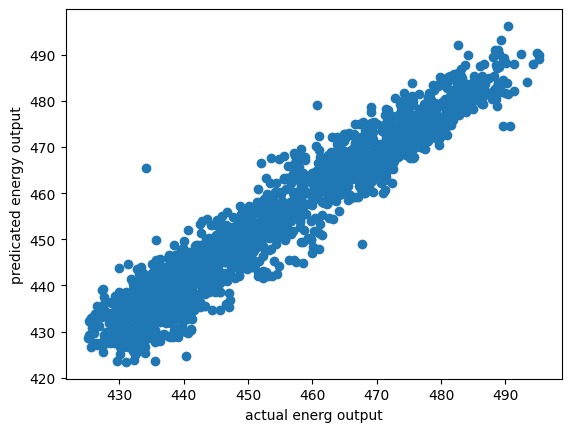

In [17]:
## Plotting actual vs predicated energy
plt.scatter(y_test[0], predicted_energy)
plt.xlabel('actual energ output')
plt.ylabel('predicated energy output')

Text(0, 0.5, 'predicated exhaust vacuum')

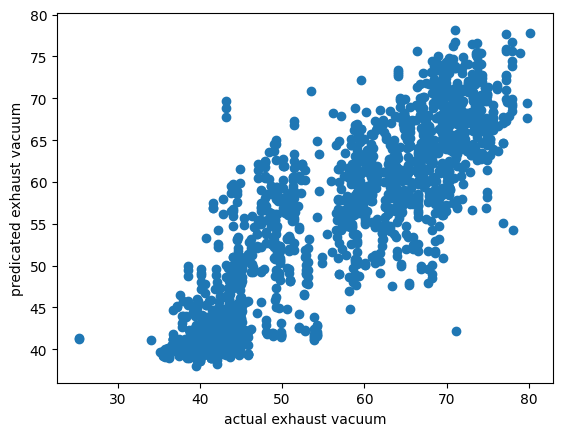

In [18]:
## Plotting actual vs predicted exhaust vacuum
plt.scatter(y_test[1], predicted_vacuum)
plt.xlabel('actual exhaust vacuum')
plt.ylabel('predicated exhaust vacuum')

In [20]:
# evaluation
print('r2 score for energy predicted :' , r2_score(y_test[0], predicted_energy))
print('r2 score forexhaust vacuum predicated :', r2_score(y_test[1], predicted_vacuum))

r2 score for energy predicted : 0.9259563929650309
r2 score forexhaust vacuum predicated : 0.7831065262246644
